In [3]:
# Import required libraries
# Trends
from pytrends.request import TrendReq
# Visualization
import matplotlib.pyplot as plt

# Dataframes
import pandas as pd


# Which Programming Language is the most popular?

In [4]:
# create a pytrends object 
# request data from Google Trends
pytrends = TrendReq(hl='en-US')
# pytrends = TrendReq(hl='en-US', tz=360, timeout=(10,25), proxies=['https://34.203.233.13:80',], retries=2, backoff_factor=0.1, requests_args={'verify':False})

# Extract data by using key words in a list
# Search is limited to 5 words at a time
keywords = ["Python", "R", "C++", "Java", "HTML"]

# command the pytrends object to search for the keywords and return data
# specify the keywords list and timeframe to be searched
pytrends.build_payload(keywords, timeframe='today 5-y')

#store keywords data

# Specify the data and pull it 
data = pytrends.interest_over_time()
data = data.drop('isPartial', axis=1)

data.tail()

,Python,R,C++,Java,HTML
date,,,,,
2022-09-25,35,50,88,24,15
2022-10-02,36,50,89,23,14
2022-10-09,38,53,91,25,15
2022-10-16,39,52,87,24,15
2022-10-23,39,49,85,25,15


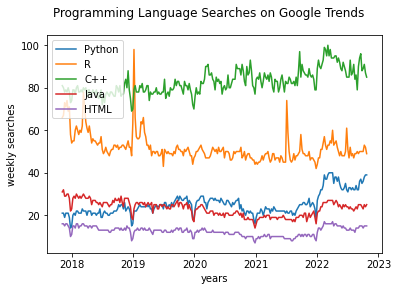

<Figure size 432x288 with 0 Axes>

In [5]:
#plot data
plt.plot(data)

#add title, x label and y label
plt.suptitle('Programming Language Searches on Google Trends')
plt.xlabel('years')                       
plt.ylabel('weekly searches')  

#add legend
plt.legend(keywords, loc='upper left')

plt.show()
plt.savefig('Images/best_language.png')

### Analyze the data

Isolate each language against to Python to compare trend.

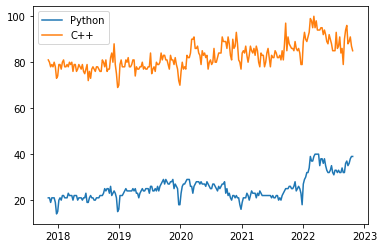

In [8]:
#compain language popularity 
# Python vs C++
focus = ['Python', 'C++'] 

plt.plot(data[focus])
plt.legend(focus)

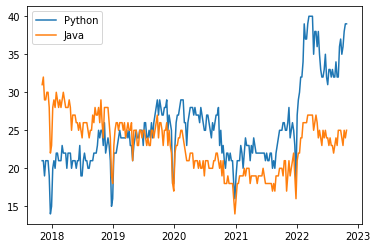

In [9]:
#compair language popularity 
# Python vs Java
focus2 = ['Python', 'Java'] 

plt.plot(data[focus2])
plt.legend(focus2)

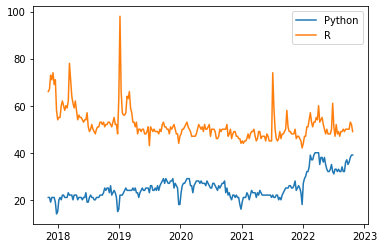

In [10]:
#compain language popularity 
# Python vs R
focus = ['Python', 'R'] 

plt.plot(data[focus])
plt.legend(focus)

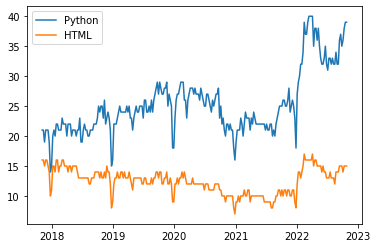

In [11]:
#compain language popularity 
# Python vs HTML
focus = ['Python', 'HTML'] 

plt.plot(data[focus])
plt.legend(focus)

# WHAT ARE THE TOP COUNTRIES SEARCHING FOR PYTHON?

In [12]:
#extract country-level keywords search data
country_data = pytrends.interest_by_region(resolution='COUNTRY', inc_low_vol=True)

#get ranking countries with the highest searches of "Python"
data2 = country_data['Python'].nlargest(10)

#convert to dataframe
data2 = pd.DataFrame(data2)
data2

,Python
geoName,
China,51
Eritrea,42
Israel,39
St. Helena,31
Singapore,27
South Korea,27
Russia,25
Hong Kong,23
Iceland,23


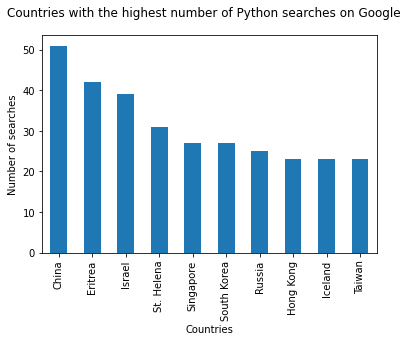

In [13]:
#plot a bar chart
data2.plot(kind='bar', legend=None)

#title
plt.suptitle('Countries with the highest number of Python searches on Google')
# ylabel
plt.ylabel('Number of searches')
# xlabel
plt.xlabel('Countries')

# show the plot
plt.show()

### PLOTTING RESULTS FOR MULTIPLE COUNTRIES

In [14]:
data3 = country_data[55:60]
data3

,Python,R,C++,Java,HTML
geoName,,,,,
Cuba,15,15,48,14,8
Curaçao,8,33,47,6,6
Cyprus,16,21,44,10,9
Czechia,16,22,42,12,8
Côte d’Ivoire,7,16,52,19,6


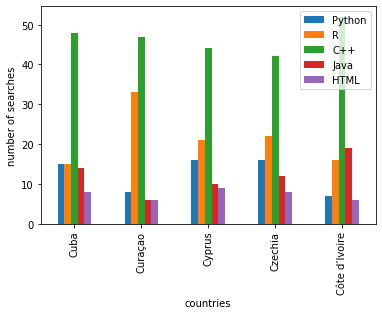

In [15]:
#plot bar chart
data3.plot(kind='bar')

plt.ylabel('number of searches')
plt.xlabel('countries')

plt.show()